In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
with open('/home/lieu/dev/ubi_data_analysis/taxable-individuals-by-assessed-income-group.csv', 'r') as f:
    income_df = pd.read_csv(f)

In [5]:
# Filter by 2018 
df = income_df.loc[income_df['year_of_assessment'] == 2018 , :].reset_index()

In [6]:
# Clean the data (make chargeable_income an int64)

df['chargeable_income'] = pd.to_numeric(df['chargeable_income'])


# Let's sum up the net tax assessed
df['net_tax_assessed'].sum() # 11.7 billion 

11730202

In [7]:
df['mean_chargeable_income'] = (df['chargeable_income'] / df['number_of_taxpayers']).round(decimals=1)

df2 = df.loc[df['resident_type'] == 'Tax Resident', :]

df2.loc[:, 'cum_pop'] = df2['number_of_taxpayers'].cumsum()
df2.loc[:, 'cum_pop_perc'] = 100* df2['cum_pop'] / df2['number_of_taxpayers'].sum()


df2

/home/lieu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lieu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,index,year_of_assessment,assessed_income_group,resident_type,number_of_taxpayers,assessable_income,chargeable_income,net_tax_assessed,mean_chargeable_income,cum_pop,cum_pop_perc
0,448,2018,"20,000 & below",Tax Resident,0,0,0,0,NaN,0,0.000000
1,449,2018,"20,001 - 25,000",Tax Resident,70440,1635795,1562189,3068,22.2,70440,3.857088
2,450,2018,"25,001 - 30,000",Tax Resident,136549,3794094,3390466,13189,24.8,206989,11.334112
3,451,2018,"30,001 - 40,000",Tax Resident,336332,11702869,9597998,63944,28.5,543321,29.750669
4,452,2018,"40,001 - 50,000",Tax Resident,251642,11263837,8787055,102871,34.9,794963,43.529849
5,453,2018,"50,001 - 60,000",Tax Resident,188803,10361107,7969255,146723,42.2,983766,53.868149
6,454,2018,"60,001 - 70,000",Tax Resident,141477,9160241,7024231,176939,49.6,1125243,61.615016
7,455,2018,"70,001 - 80,000",Tax Resident,107837,8062225,6171095,189605,57.2,1233080,67.519855
8,456,2018,"80,001 - 100,000",Tax Resident,150021,13404656,10275101,385071,68.5,1383101,75.734566
9,457,2018,"100,001 - 150,000",Tax Resident,201412,24502674,19155244,1038744,95.1,1584513,86.763298


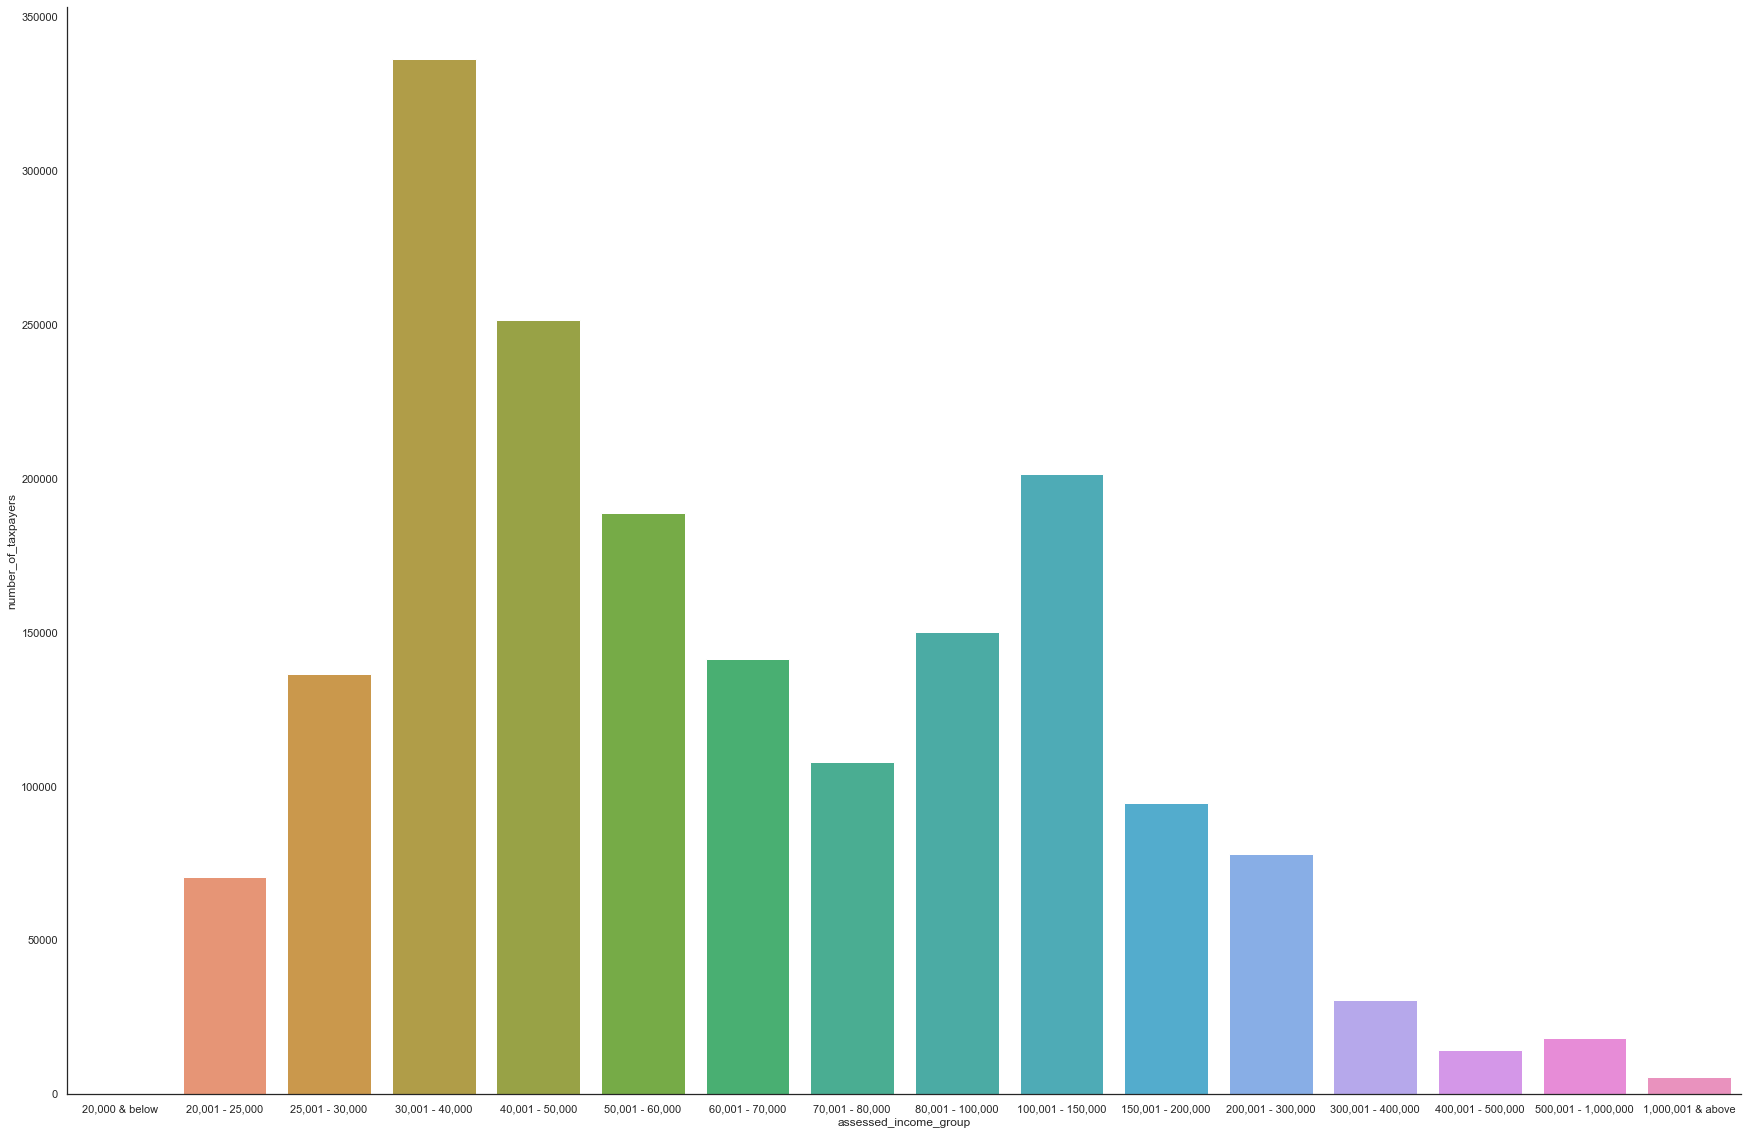

In [8]:
sns.set(rc={'figure.figsize': (30, 20)})
sns.set_style("white")
sns.barplot(x='assessed_income_group', y='number_of_taxpayers', data=df2)
sns.despine()

'\nfor index, row in df2.iterrows():\n    g.text(row[\'assessed_income_group\'], row[\'cum_pop_perc\'], row[\'cum_pop_perc\'], color=\'black\', ha=\'center\')\n    \n#g.text(df2[\'assessed_income_group\'], df2[\'cum_pop_perc\'], df2[\'cum_pop_perc\'], color="black", ha=\'center\')\n'

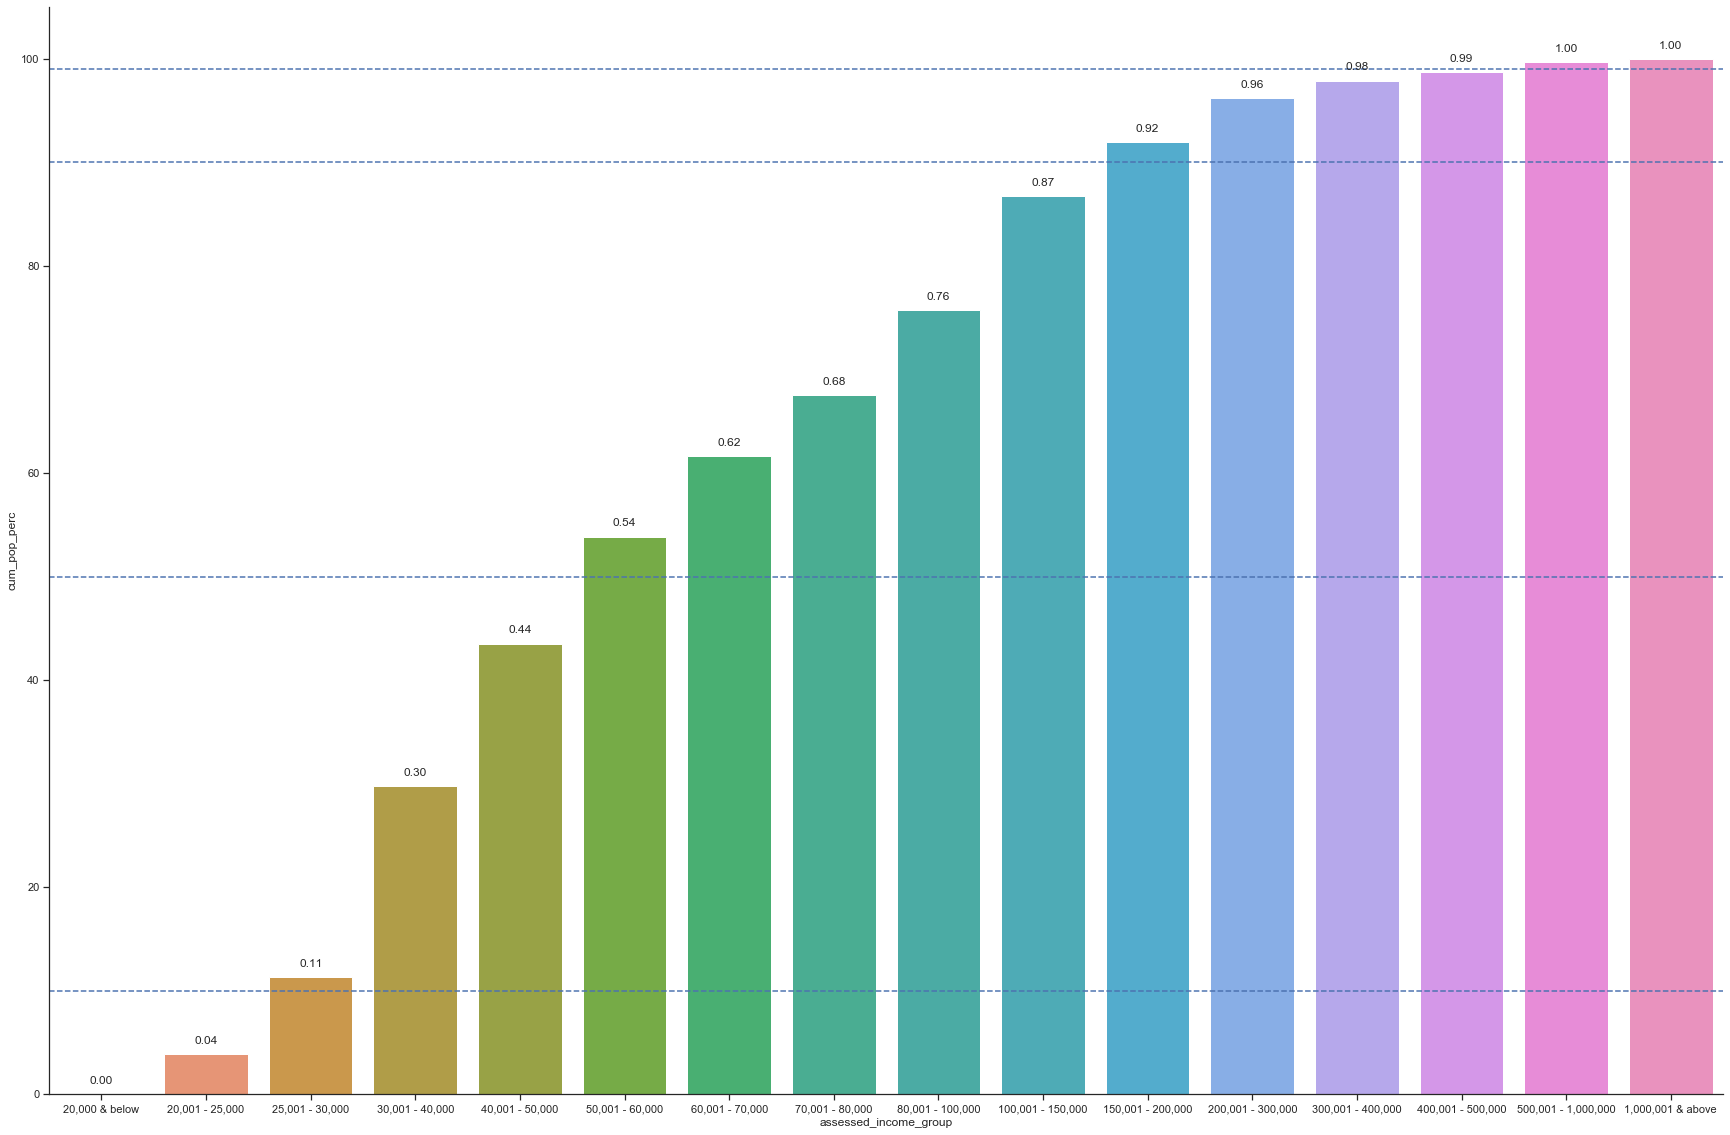

In [9]:
sns.set_style("ticks")
g = sns.barplot(x='assessed_income_group', y='cum_pop_perc', data=df2)
sns.despine()

ax1 = g.axes
ax1.axhline(10, ls='--')
ax1.axhline(50, ls='--')
ax1.axhline(90, ls='--')
ax1.axhline(99, ls='--')

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}'.format(height/100),
            ha="center")

'''
for index, row in df2.iterrows():
    g.text(row['assessed_income_group'], row['cum_pop_perc'], row['cum_pop_perc'], color='black', ha='center')
    
#g.text(df2['assessed_income_group'], df2['cum_pop_perc'], df2['cum_pop_perc'], color="black", ha='center')
'''

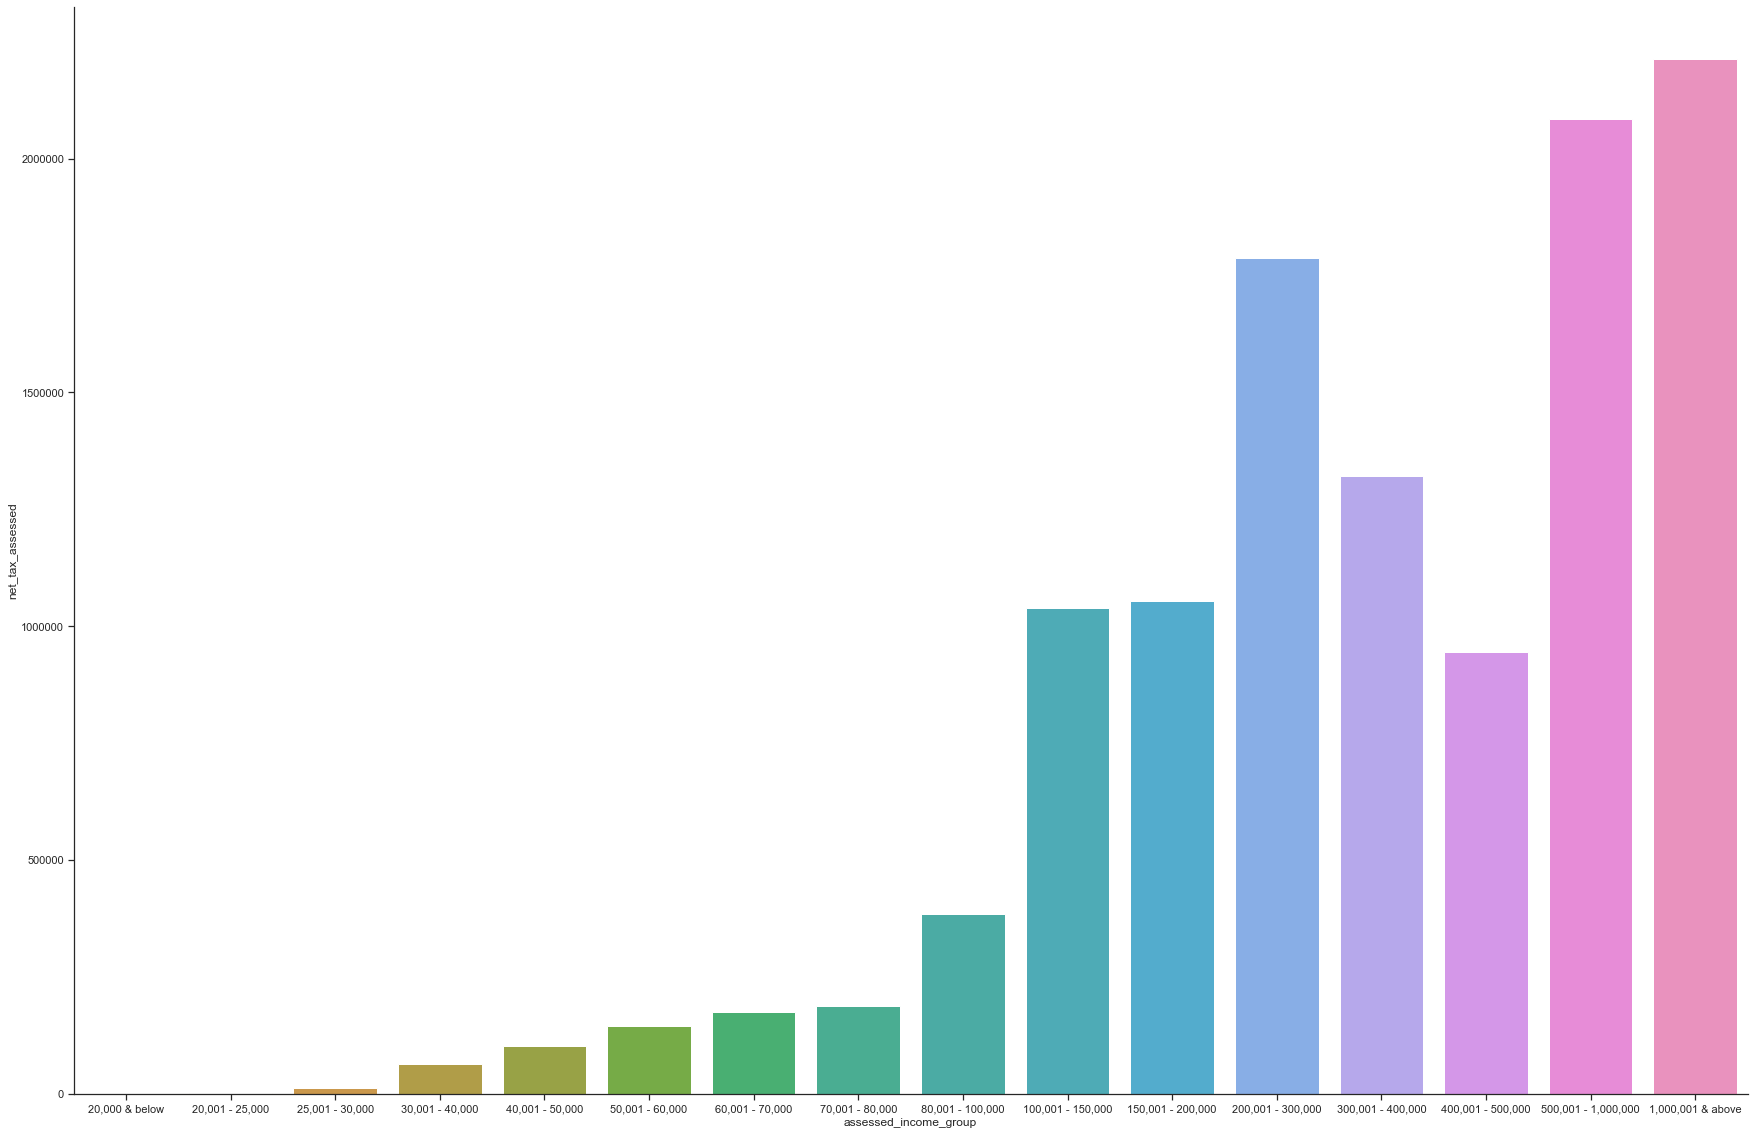

In [10]:
sns.set_style("ticks")
g = sns.barplot(x='assessed_income_group', y='net_tax_assessed', data=df2)
sns.despine()